In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

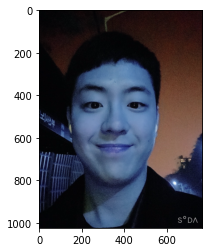

In [2]:
my_image_path = ("/content/drive/MyDrive/Colab Notebooks/make_sticker_app/CBF0281D-BEC7-44D7-894C-B5B5C8B9FD7D_1_105_c.jpeg")
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()

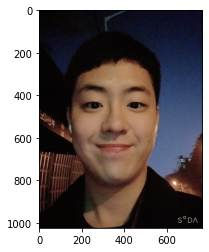

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [4]:
detector_hog = dlib.get_frontal_face_detector()

In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(161, 333) (546, 718)]]


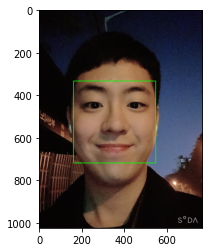

In [6]:
print(dlib_rects)

for dlib_rect in dlib_rects:
  l = dlib_rect.left()
  t = dlib_rect.top()
  r = dlib_rect.right()
  b = dlib_rect.bottom()

  cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [7]:
model_path = ("/content/drive/MyDrive/Colab Notebooks/make_sticker_app/models/shape_predictor_68_face_landmarks .dat")
landmark_predictor = dlib.shape_predictor(model_path)

In [8]:
list_landmarks= []

for dlib_rect in dlib_rects:
  points = landmark_predictor(img_rgb, dlib_rect)

  list_points = list(map(lambda p: (p.x, p.y), points.parts()))
  list_landmarks.append(list_points)
print(len(list_landmarks[0]))

68


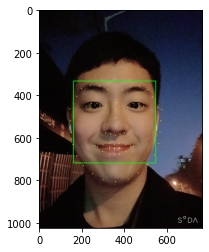

In [9]:
for landmark in list_landmarks:
  for point in landmark:
    cv2.circle(img_show, point, 2, (0, 255, 255), -1)
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [10]:
for dlib_rect,landmark in zip(dlib_rects, list_landmarks):
  print (landmark[30])
  x = landmark[30][0]
  y = landmark[30][1]
  w = h = dlib_rect.width()
  print('(x,y) : (%d,%d)'%(x,y))
  print('(w,h) : (%d,%d)'%(w,h))

(359, 544)
(x,y) : (359,544)
(w,h) : (386,386)


스티커 사진 불러오기

(386, 386, 3)


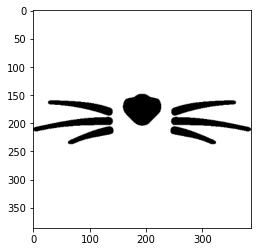

In [11]:
sticker_path = ("/content/drive/MyDrive/Colab Notebooks/make_sticker_app/sticker/cat-whiskers.png")
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print(img_sticker.shape)
plt.imshow(img_sticker)
plt.show()

In [12]:
refined_x = x - w //2
refined_y = y - h //2
print('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (166,351)


In [13]:
if refined_x < 0:
  img_sticker = img_sticker[:, -refined_x:]
  refined_x = 0
if refined_y < 0:
  img_sticker = img_sticker[-refined_y:, :]
  refined_y = 0
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))


(x,y) : (166,351)


In [14]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

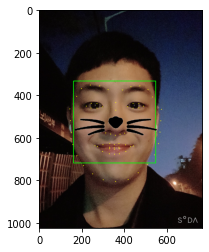

In [15]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

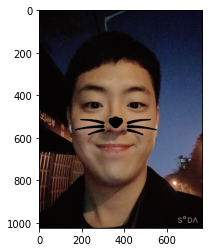

In [16]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 회고

처음에 img_sticker를 노드에 나왔던 것처럼 0으로 하고 진행했더니, 이미지의 배경인 흰색까지 그대로 나오는 현상이 발생하였다. 이후 숫자를 255로 변경하여 진행하니 배경화면이 나오지 않고 고양이 수염만 나오게 되었다.  
코 끝인 33으로 진행했더니, 코의 아랫부분에 나와서  30으로 수정했더니 알맞은 위치가 되었다.